In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np

CIFAR-10

In [2]:
dataset = tf.keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [65]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
labels_dict = {i:name for i, name in enumerate(labels)}

In [66]:
labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train, x_test = x_train/255, x_test/255 

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (2,2)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="sigmoid")
    ])

In [9]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.01)

In [10]:
model.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=2000, epochs=10)

Epoch 1/10


C:\Users\Akhil\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 [==============================] - 16s 209ms/step - loss: 2.3017 - accuracy: 0.1084 - val_loss: 2.2924 - val_accuracy: 0.1382
Epoch 2/10
25/25 [==============================] - 3s 105ms/step - loss: 2.2935 - accuracy: 0.1201 - val_loss: 2.2858 - val_accuracy: 0.1338
Epoch 3/10
25/25 [==============================] - 3s 107ms/step - loss: 2.2870 - accuracy: 0.1263 - val_loss: 2.2789 - val_accuracy: 0.1365
Epoch 4/10
25/25 [==============================] - 3s 106ms/step - loss: 2.2825 - accuracy: 0.1308 - val_loss: 2.2719 - val_accuracy: 0.1408
Epoch 5/10
25/25 [==============================] - 3s 105ms/step - loss: 2.2753 - accuracy: 0.1395 - val_loss: 2.2640 - val_accuracy: 0.1487
Epoch 6/10
25/25 [==============================] - 3s 105ms/step - loss: 2.2684 - accuracy: 0.1451 - val_loss: 2.2549 - val_accuracy: 0.1564
Epoch 7/10
25/25 [==============================] - 3s 107ms/step - loss: 2.2606 - accuracy: 0.1527 - val_loss: 2.2437 - val_accuracy: 0.1695
Epoch 8/10
25/25

Loss

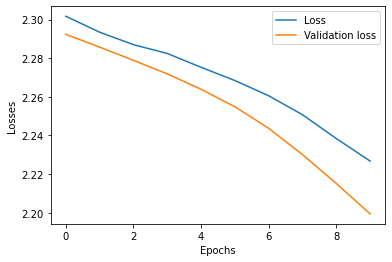

In [14]:
    plt.figure()
    plt.plot(history.history["loss"], label="Loss")
    plt.plot(history.history["val_loss"], label="Validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Losses")
    plt.legend()
    plt.show()

Accuracy

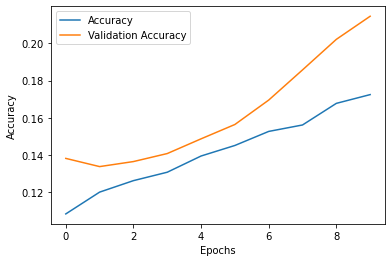

In [15]:
plt.figure()
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Prediction

In [41]:
test = random.randint(1,10000)
test = x_test[:1]

In [42]:
test.shape

(1, 32, 32, 3)

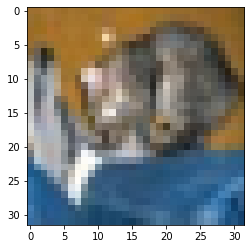

In [43]:
plt.imshow(test[0])

In [44]:
test.shape

(1, 32, 32, 3)

In [45]:
pred = model.predict(test)

1/1 [==============================] - 0s 298ms/step


In [72]:
pred = np.argmax(pred).astype("int32")

In [73]:
labels_dict[pred]

'cat'